In [ ]:
# Author : Dr. Davis Thomas Daniel
# Last updated : 03.09.2025

# Data (1D)

## Importing EPRpy

In [1]:
import eprpy as epr

## Loading data

In [2]:
tempo = epr.load('tempo.DSC')

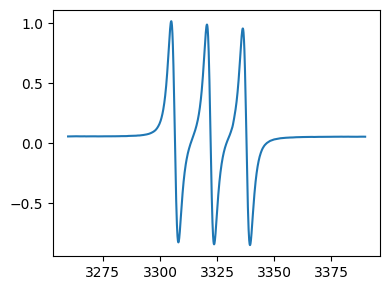

In [3]:
fig,ax=tempo.plot()

In [4]:
type(tempo) # tempo is an EprData object

eprpy.loader.EprData

## Plotting

* Every `EprData` object has a plot method for making quick plots for inspection.

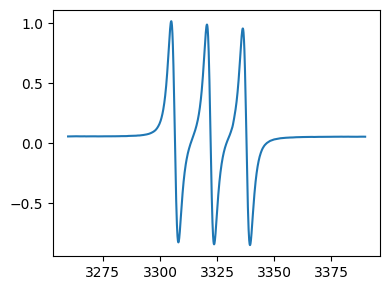

In [5]:
fig,ax = tempo.plot()


### Formatting plots

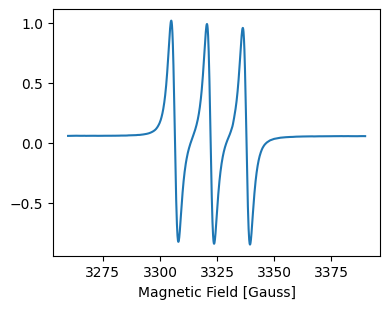

In [6]:
ax.set_xlabel('Magnetic Field [Gauss]') # set x axis label
fig

### Use attributes directly to plot

* Alternatively, plots can be made directly using matplotlib and ``EprData`` attributes with full control over formatting.

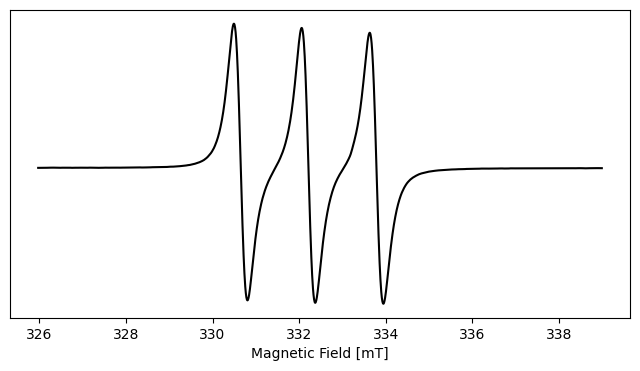

In [7]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(tempo.x/10,tempo.data,color='black') # convert Gauss to mT
ax.set_xlabel('Magnetic Field [mT]') # set x axis label
_=ax.set_yticks([]) # hide intensity


### Plot on the g axis

* If the one of the axis is magnetic field, the g values are calculated internally and can be used for plotting as shown below.

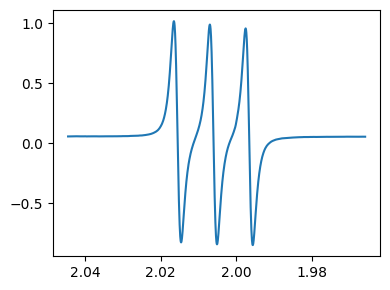

In [8]:
fig,ax = tempo.plot(g_scale=True)

# Operations on Data

## Scaling data

After scaling : 


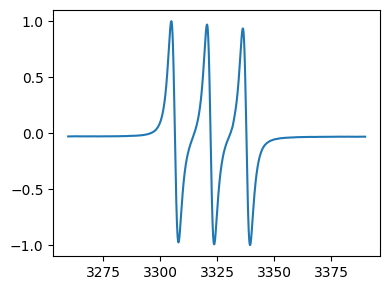

In [9]:
# import EPRpy
import eprpy as epr

# load data
tempo = epr.load('tempo.DSC')

# scale between -1 and 1
tempo_scaled = tempo.scale_between(-1,1)

print('After scaling : ')
fig,ax = tempo_scaled.plot()

## Baseline correction

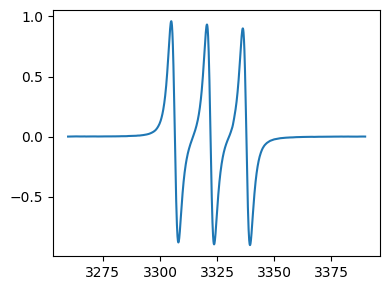

In [12]:
# import EPRpy
import eprpy as epr

# load data
tempo = epr.load('tempo.DSC')

# linear baseline correction
tempo_bc = tempo.baseline_correct(npts=10) # default is linear baseline correction, npts is the data points used for baseline correction, here 10 points from the start and end of data
fig,ax = tempo_bc.plot()

### Interactive baseline correction

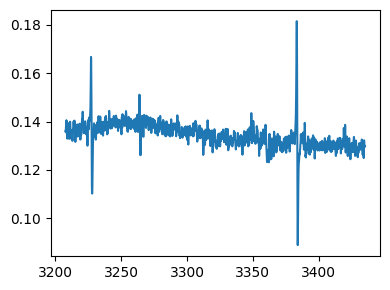

In [19]:
# import EPRpy
import eprpy as epr

# load data needs baseline correction
epr_data = epr.load('data_for_bc.DTA')

# plot the data without bc
fig,ax  = epr_data.plot()

* As an example, we baseline correct the spectrum by using a 3° polynomial. For baseline calculation, the points are picked interactively.

In [20]:
# if you are using a jupyter notebook, switch to qt backend for matplotlib
#%matplotlib qt

# to switch back to inline mode:
#%matplotlib inline

In [ ]:
epr_data_bc = epr_data.baseline_correct(interactive=True, method='polynomial',order=3)

<img src="../images/interactive_baseline_correction.gif" alt="interactive_bc" width="400">


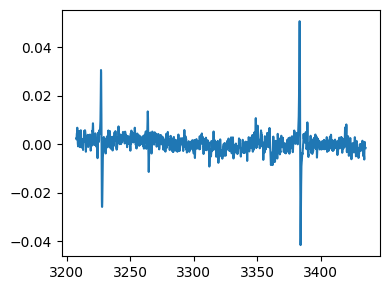

In [22]:
# plot the baseline corrected spectra
fig,ax = epr_data_bc.plot()

## Computing integrals

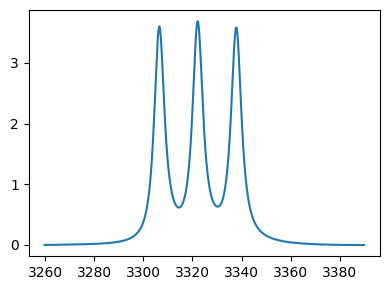

In [24]:
# import EPRpy
import eprpy as epr

# load data
tempo = epr.load('tempo.DSC')

# baseline correction and integration
tempo_proc = tempo.baseline_correct(npts=10)
tempo_proc = tempo_proc.integral()

# plot the absorption signal
fig,ax = tempo_proc.plot()

## Selecting a region

* For this example, we assume that the desired region is  the low field hyperfine line.

Full spectrum : 


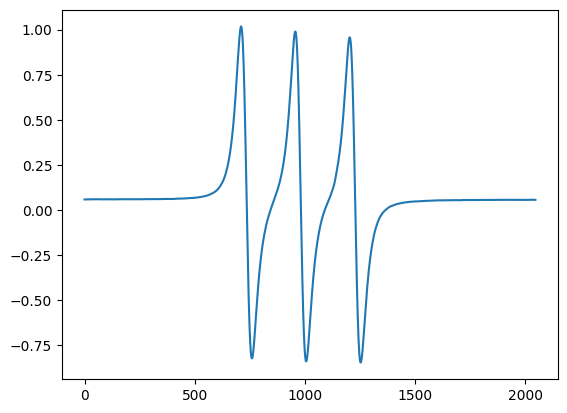

In [25]:
# import EPRpy
import eprpy as epr

# load data
tempo = epr.load('tempo.DSC')

# Plot the data using an array with unity spacing to find corresponding indices
import matplotlib.pyplot as plt
print('Full spectrum : ')
_=plt.plot(tempo.data)

# make a new EprData object corresponding to the desired region
tempo_region = tempo.select_region(range(550,850)) # indices from 0 to 900

Selected region : 


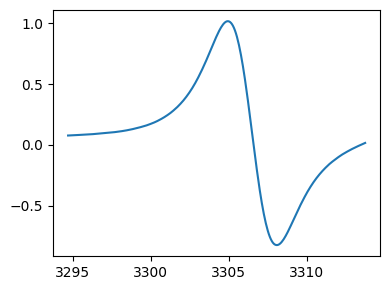

In [26]:
# selected region, note that the the new EprData object tempo_region only has the data corresponding to this region
print('Selected region : ')
fig,ax = tempo_region.plot()

## History of data operations

EPRpy allows for keeping a log of data operations done on an EprData object, as long as in-built functions are used.

In [27]:
# import EPRpy
import eprpy as epr

# load data
tempo = epr.load('tempo.DSC')

# do some operations
tempo_proc1 = tempo.scale_between(-1,1)
tempo_proc2 = tempo_proc1.baseline_correct(npts=10)
tempo_proc3 = tempo_proc2.integral()

### Access history

* Each ``EprData`` object stores history of all data operations and the corresponding ``EprData`` object in a list of lists. The first item in each list is the description of the data operation and the second item is the corresponding ``EprData`` object.

In [28]:
tempo_proc3.history

[['2025-09-03 17:07:52.029357 : Data loaded from tempo.DSC.',
 ['2025-09-03 17:07:52.030758 : Data scaled between -1 and 1.',
 ['2025-09-03 17:07:52.032316 : Baseline corrected',
 ['2025-09-03 17:07:52.034752 : Integral calculated',


* To plot or access a specific ``EprData`` from the history, simply use indexing. For instance, to view the original data again, plot the first item in history:

2025-09-03 17:07:52.029357 : Data loaded from tempo.DSC.


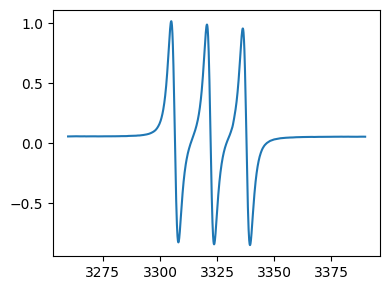

In [29]:
print(tempo_proc3.history[0][0])
fig,ax = tempo_proc3.history[0][1].plot() 

2025-09-03 17:07:52.032316 : Baseline corrected


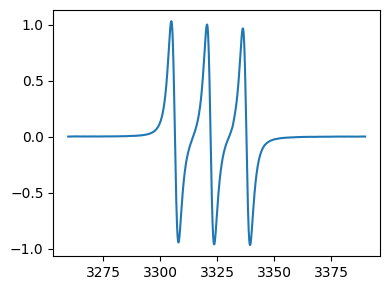

In [30]:
print(tempo_proc3.history[2][0])
fig,ax = tempo_proc3.history[2][1].plot() 

# Data (2D)

 ## Importing EPRpy

In [31]:
import eprpy as epr

## Loading data

In [32]:
## TEMPO radical monitored as a function of time
## For some 2D datasets, a .GF file must also be present in the same folder.
tempo2d = epr.load('tempo_time.DSC')

In [33]:
tempo2d.data.shape # this dataset corresponds to 48 time values (tempo2d.y) and 1024 field points (tempo2d.x)

(48, 1024)

In [34]:
tempo2d.y # time in seconds

array([    0.  ,  1533.1 ,  3065.64,  4598.25,  6130.95,  7663.46,
        9196.02, 10728.54, 12261.1 , 13793.49, 15326.14, 16858.79,
       18391.58, 19924.32, 21457.01, 22989.5 , 24521.66, 26054.41,
       27586.94, 29119.64, 30652.35, 32184.94, 33717.75, 35250.49,
       36783.1 , 38315.81, 39848.56, 41381.3 , 42913.97, 44446.53,
       45978.94, 47511.65, 49044.47, 50576.93, 52109.66, 53642.3 ,
       55175.05, 56707.73, 58240.42, 59773.14, 61305.37, 62837.76,
       64370.26, 65902.73, 67435.12, 68967.26, 70499.68, 72031.99],
      dtype='>f8')

In [35]:
tempo2d.x # field values in Gauss

array([3273.65      , 3273.74658203, 3273.84316406, ..., 3372.26025394,
       3372.35683597, 3372.453418  ], shape=(1024,))

## Plotting

### Stacked plot

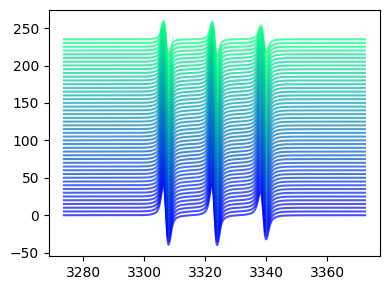

In [36]:
fig,ax = tempo2d.plot(spacing=5)

### Superimposed plot

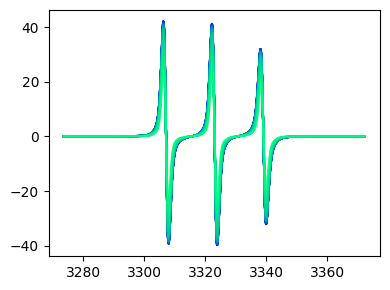

In [37]:
fig,ax = tempo2d.plot(plot_type='superimposed')

### Pseudocolor plots

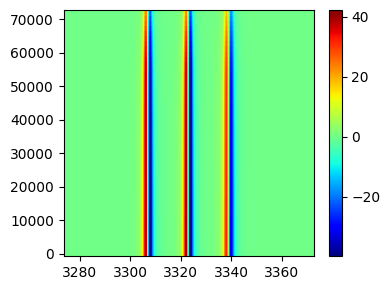

In [38]:
fig,ax = tempo2d.plot(plot_type='pcolor')

### Surface 3D plot

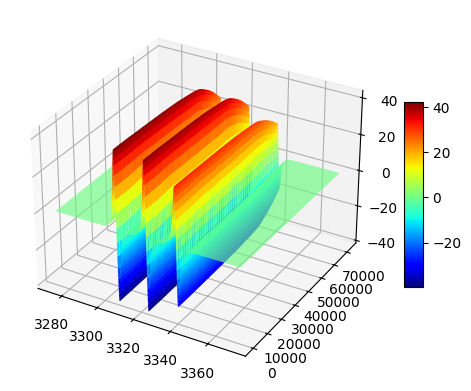

In [39]:
fig,ax = tempo2d.plot(plot_type='surf')

# Workflows

## HYSCORE

In [1]:
import eprpy as epr

In [2]:
tempo_hyscore = epr.load("tempo_hyscore.DSC")

### Plot the time-domain data

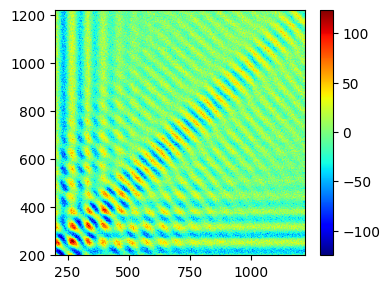

In [3]:
_=tempo_hyscore.plot(plot_type="pcolor")

### Process using HYSCORE workflow

In [4]:
hyscore_proc = tempo_hyscore.workflow(zf=1024) # zero fill with 1024 points

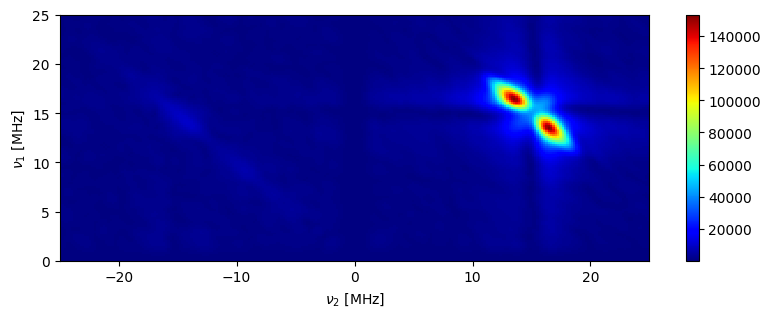

In [5]:
fig,ax=hyscore_proc.plot(plot_type="pcolor")
fig.set_size_inches((10,3))
ax.set_ylim((0,25))
ax.set_xlim((-25,25))
ax.set_xlabel(r"$\nu_{2}$"+" [MHz]")
_=ax.set_ylabel(r"$\nu_{1}$"+" [MHz]")

In [ ]:
# Processing workflows can be controlled by other parameters
# zero fill with 1024 points
# symmetrise the final spectrum along the diagonal
# change polynomila order for background correction to 4
# verbose=True for printing progress

hyscore_proc1 = tempo_hyscore.workflow(zf=1024,symmetrise="diag",poly_order=4,verbose=True) 

Starting HYSCORE workflow...
Baseline correction in dimension 1 with polynomial of order 4...
Baseline correction in dimension 2 with polynomial of order 4...
Applying Hamming window in dimension 1...
Applying Hamming window in dimension 2...
Zero filling 1024 points dimension 1 and 2...
Generating frequency axes...
2D Fourier transformation...
Symmetrising along the diagonal and the antidiagonal...
Completed in 0.08 seconds.


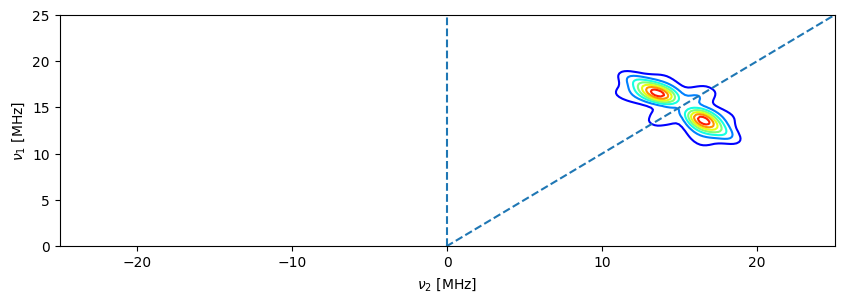

In [ ]:
# you can also plot manually using matplotlib and format to your liking

import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,3))
ax.contour(hyscore_proc1.data_dict["frequency_axis1"],hyscore_proc1.data_dict["frequency_axis2"],hyscore_proc1.data,cmap="jet")
ax.set_ylim((0,25))
ax.set_xlim((-25,25))
ax.vlines(0,ymax=25,ymin=0,linestyles="dashed")
ax.plot(hyscore_proc1.x,hyscore_proc1.x,linestyle="dashed")
ax.set_xlabel(r"$\nu_{2}$"+" [MHz]")
_=ax.set_ylabel(r"$\nu_{1}$"+" [MHz]")

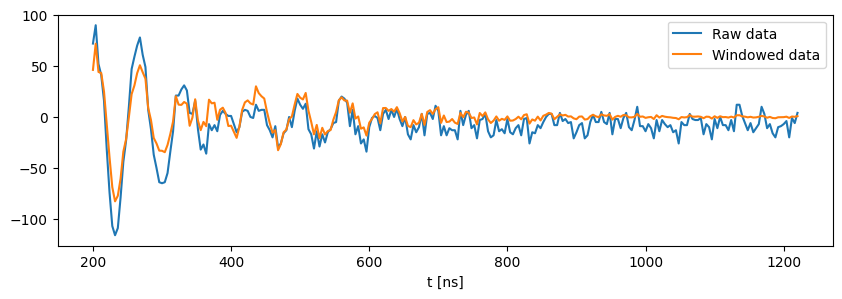

In [16]:
# you can also plot other arrays from any step of the processing pipeline
# here the raw time domain data before and after applying a window function is visualized

import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,3))

ax.plot(hyscore_proc1.data_dict["x_raw"],hyscore_proc1.data_dict["raw_data"].real[0],label="Raw data")
ax.plot(hyscore_proc1.data_dict["x_raw"],hyscore_proc1.data_dict["bc_w_data"][0],label="Windowed data")
ax.set_xlabel("t [ns]")
_=ax.legend()


## 2P ESEEM

In [2]:
tempo_eseem = epr.load("tempo_eseem.DSC")

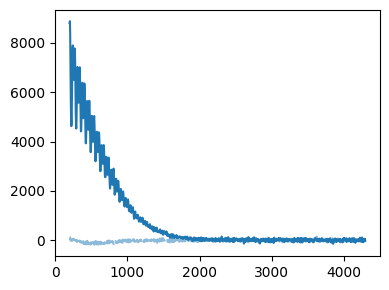

In [3]:
_=tempo_eseem.plot()

In [4]:
tempo_eseem.pulse_program # this pulse program is supported, check the documentation for pulse programs which support worklfows

'2P ESEEM'

In [6]:
eseem_proc = tempo_eseem.workflow(zf=1024,verbose=True)

Starting ESEEM workflow...
Detected pulse program : 2P ESEEM
Baseline correction using an exponential decay function...
Applying Hamming window along dimension 1...
Zero filling 1024 points...
Generating frequency axes...
Fourier transformation...
Completed in 0.01 seconds.


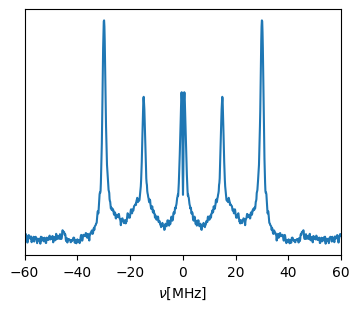

In [10]:
fig,ax = eseem_proc.plot()
ax.set_xlabel(r"$\nu$" + "[MHz]")
ax.set_xlim((-60,60))
_=ax.set_yticks([])